In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [51]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE22.csv',header= 1)

In [52]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [53]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [55]:
df.count()

day            246
month          245
year           245
Temperature    245
 RH            245
 Ws            245
Rain           245
FFMC           245
DMC            245
DC             245
ISI            245
BUI            245
FWI            245
Classes        244
dtype: int64

In [56]:
df.drop([122,123],inplace=True)

In [57]:
~df['FWI'].str.isnumeric().count()

-245

In [58]:
df.count()

day            244
month          244
year           244
Temperature    244
 RH            244
 Ws            244
Rain           244
FFMC           244
DMC            244
DC             244
ISI            244
BUI            244
FWI            244
Classes        243
dtype: int64

In [59]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [70]:
df['FWI']=df['FWI'].replace('14.6 9',0.4)

In [71]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [68]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)




In [140]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,2012-06-01
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,2012-06-02
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,2012-06-03
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,2012-06-04
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,2012-06-05


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(6), int32(5), object(3)
memory usage: 23.8+ KB


In [74]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [75]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [76]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [77]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [78]:
df['date']=pd.to_datetime(df[['day','month','year']])

In [79]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,2012-06-01
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,2012-06-02
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,2012-06-03
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,2012-06-04
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,2012-09-26
242,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0.0,2012-09-27
243,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,2012-09-28
244,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,2012-09-29


In [267]:
df1=df[['Temperature','day','month','RH','Ws','Rain','FFMC','DMC','ISI','BUI','Classes']]

In [268]:
dataset=pd.DataFrame(df1)

In [269]:
dataset.columns

Index(['Temperature', 'day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI',
       'BUI', 'Classes'],
      dtype='object')

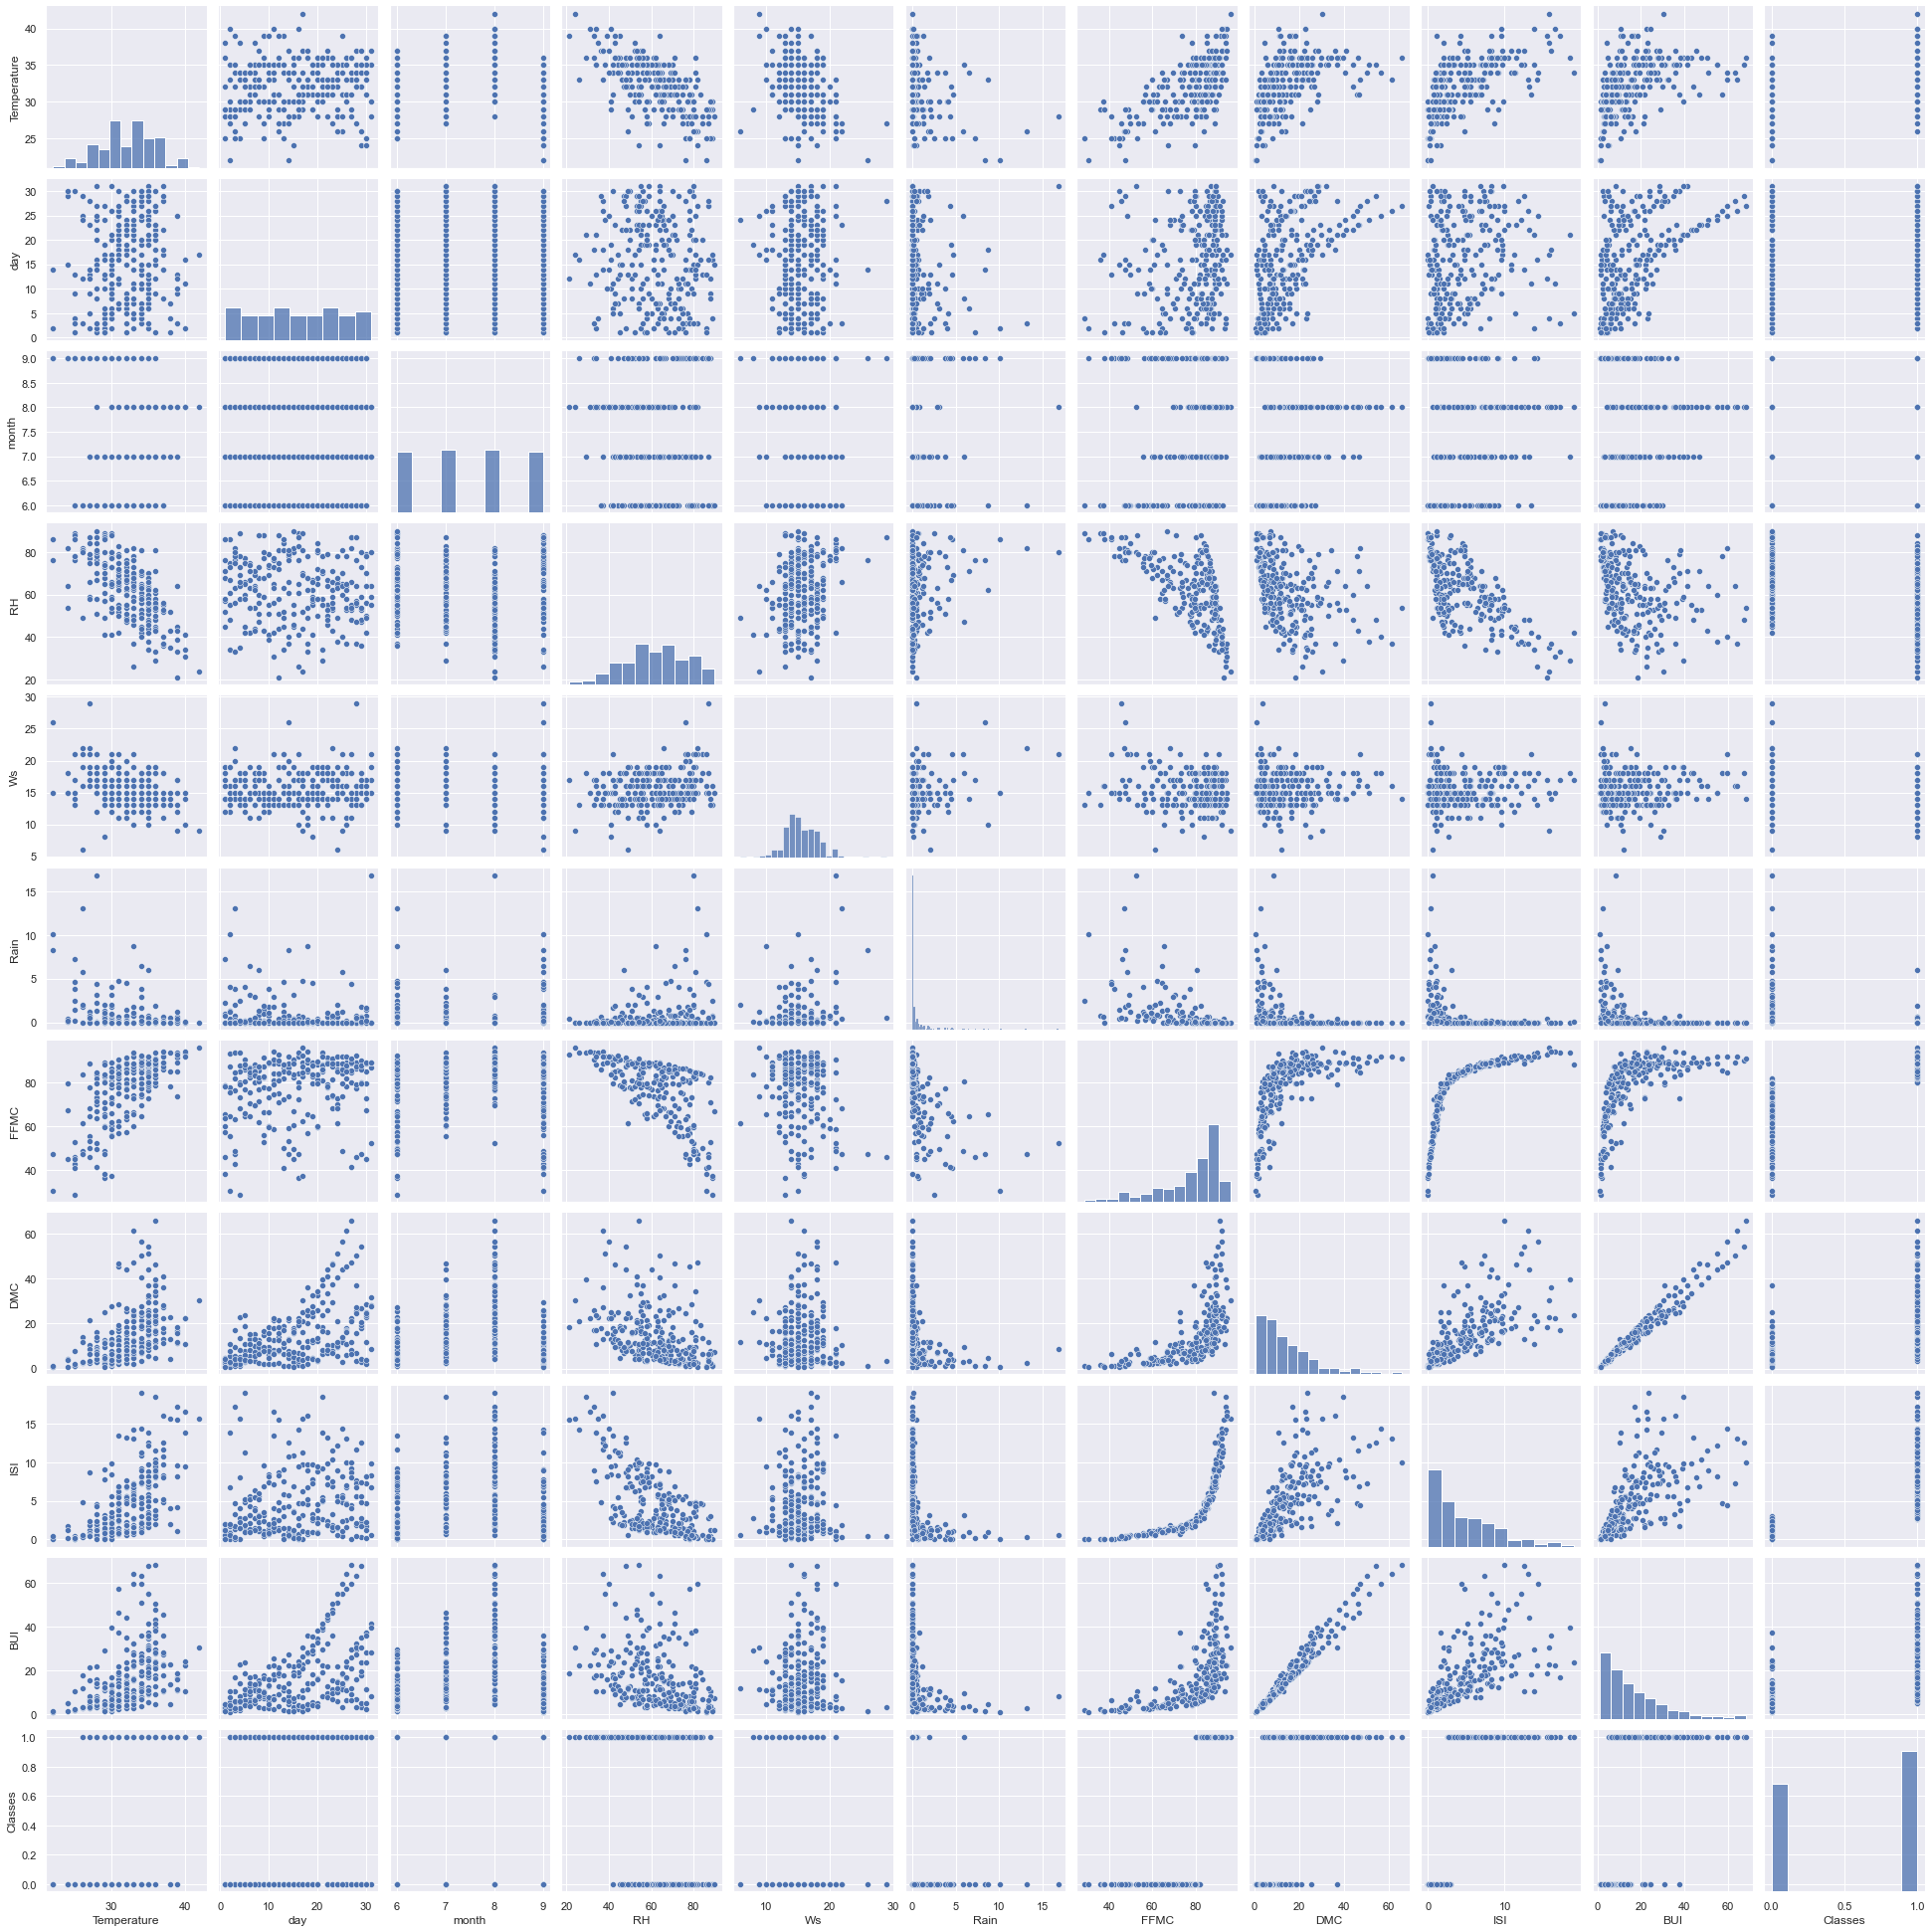

In [270]:
import seaborn as sns
sns.pairplot(dataset)

# check Correlation

<AxesSubplot:>

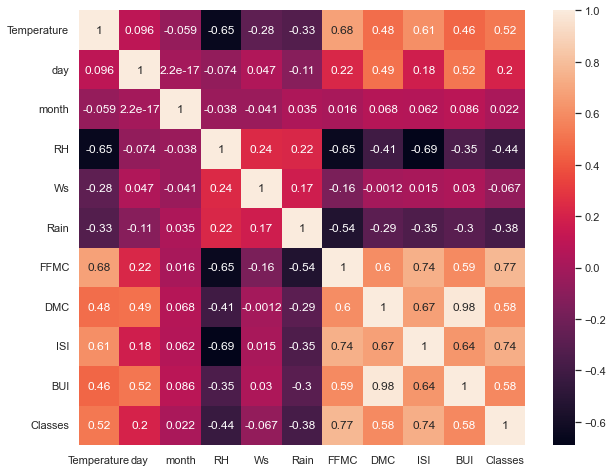

In [271]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(dataset.corr(),annot=True)

In [272]:
dataset.head(2)

,Temperature,day,month,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,29,1,6,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,29,2,6,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0


In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int32  
 1   day          244 non-null    int32  
 2   month        244 non-null    int32  
 3   RH           244 non-null    int32  
 4   Ws           244 non-null    float64
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   ISI          244 non-null    float64
 9   BUI          244 non-null    float64
 10  Classes      244 non-null    float64
dtypes: float64(7), int32(4)
memory usage: 27.2 KB


# Independent And Dependent Features

In [275]:
x=dataset.loc[:, 'day':'Classes'] 
y=dataset.iloc[:,:-10]

In [276]:
dataset.iloc[:,:-10]

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
241,30
242,28
243,27
244,24


# Independent Features

In [277]:
x.head()

,day,month,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,1,6,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,2,6,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0
2,3,6,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0
3,4,6,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,5,6,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0


In [278]:
y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


In [279]:
from sklearn.model_selection import train_test_split

In [280]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=10)

In [281]:
x_train.shape

(163, 10)

In [282]:
y_train.shape

(163, 1)

In [283]:
x_test.shape

(81, 10)

In [284]:
y_test.shape

(81, 1)

# Standardize or feature scaling the datasets

In [285]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [286]:
x_train=scaler.fit_transform(x_train)

In [287]:
x_test=scaler.transform(x_test)

In [288]:
x_train

array([[ 1.0627621 ,  1.33562856, -0.85631108, ..., -0.9695694 ,
        -0.32535487, -1.06992376],
       [ 0.34495731,  0.44338489, -0.52508491, ...,  1.17918645,
         0.76565444,  0.93464604],
       [ 1.30203036, -1.34110244,  0.13736742, ...,  0.4708054 ,
         0.35302912,  0.93464604],
       ...,
       [-0.01394508,  1.33562856, -0.72382061, ...,  0.5180308 ,
         0.08727045,  0.93464604],
       [-1.32992053, -1.34110244,  0.13736742, ..., -0.59176617,
        -0.76595478, -1.06992376],
       [-0.61211574, -1.34110244,  1.13104591, ..., -0.80428049,
        -0.27639932, -1.06992376]])

In [289]:
x_test

array([[-4.92481607e-01, -4.48858777e-01, -3.92594448e-01,
        -9.14668296e-02,  1.48701853e+00, -1.82411230e-01,
        -6.02677495e-01, -7.33442383e-01, -6.82030988e-01,
        -1.06992376e+00],
       [ 1.90020102e+00, -4.48858777e-01,  1.37367416e-01,
         6.35806011e-01, -4.41414004e-01,  6.64566895e-01,
         1.37979749e+00,  4.94418103e-01,  1.72378441e+00,
         9.34646039e-01],
       [-1.68882292e+00,  4.43384889e-01, -1.12129201e+00,
        -4.55103250e-01, -4.41414004e-01,  9.08075201e-02,
        -7.86536062e-01, -6.38991577e-01, -8.28897625e-01,
        -1.06992376e+00],
       [-1.44955466e+00,  4.43384889e-01,  7.11221826e-02,
        -4.55103250e-01, -2.41920984e-01, -5.94627923e-02,
        -7.14591405e-01, -7.09829682e-01, -7.72948430e-01,
        -1.06992376e+00],
       [-7.31749870e-01,  4.43384889e-01, -1.93858749e-01,
         6.35806011e-01, -4.41414004e-01,  6.78227832e-01,
         1.28490116e-02,  5.18030804e-01,  9.42640966e-02,
         9.

# Model Training

In [290]:
from sklearn.linear_model import LinearRegression

In [291]:
regression=LinearRegression()

In [292]:
regression

LinearRegression()

In [293]:
regression.fit(x_train,y_train)

LinearRegression()

# print the coefficients and the intercept

In [294]:

print(regression.coef_)

[[-0.12226637 -0.26616021 -1.27268003 -0.58056063 -0.21236801  0.97549411
  -0.53976171  0.09943008  1.00462163  0.14767476]]


In [295]:
print(regression.intercept_)

[32.17791411]


# Prediction for the test data

In [296]:

reg_pred=regression.predict(x_test)

In [297]:
reg_pred

array([[31.82580149],
       [33.4372993 ],
       [33.51025218],
       [31.78481361],
       [33.05961261],
       [34.88981541],
       [33.64709353],
       [33.26168864],
       [32.24787557],
       [33.36877695],
       [33.61063088],
       [27.28642118],
       [35.24703781],
       [29.09378515],
       [32.35454658],
       [32.17669523],
       [34.58871582],
       [27.53782726],
       [36.20892224],
       [34.59418004],
       [33.3231812 ],
       [33.43958372],
       [33.98827899],
       [33.09435465],
       [35.83150898],
       [29.02212953],
       [32.07180296],
       [32.56735526],
       [27.06639249],
       [32.3199936 ],
       [25.49813837],
       [26.56048818],
       [34.59099503],
       [32.13745809],
       [33.2803947 ],
       [30.15403668],
       [29.07446515],
       [32.25506076],
       [27.31633152],
       [35.52983643],
       [32.52370564],
       [34.04242962],
       [34.32026857],
       [30.95370987],
       [36.41208138],
       [34

# Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

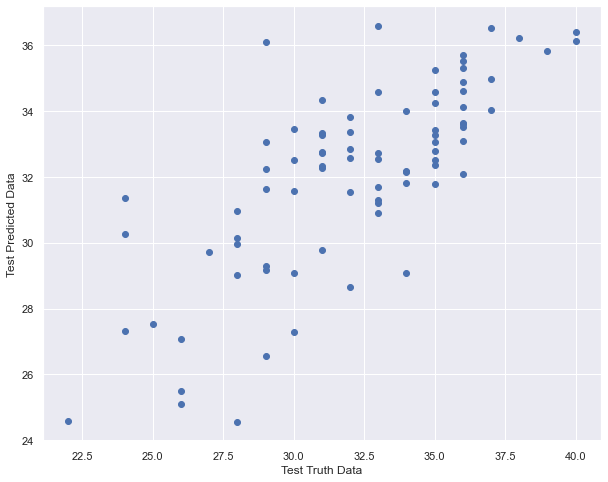

In [298]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

# residuals

In [299]:
residuals=y_test-reg_pred

In [300]:
residuals

,Temperature
164,2.174199
60,1.562701
61,2.489748
63,3.215186
69,1.940387
...,...
171,0.268727
234,-7.084566
146,1.322414
210,-3.574855


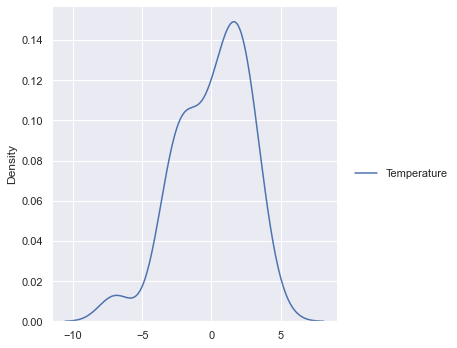

In [301]:
sns.displot(residuals,kind="kde")

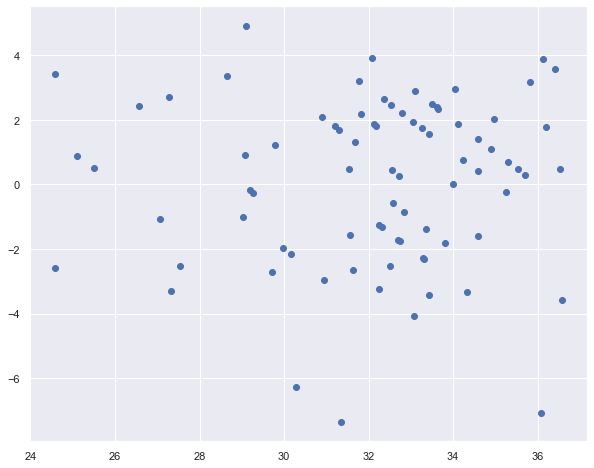

In [302]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [303]:
##mean_squared_error
##mean_absolute_error
##root mean square error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"mean_squared_error = {mean_squared_error(y_test,reg_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test,reg_pred)}")
print(f"root_mean_square_error = {np.sqrt(mean_squared_error(y_test,reg_pred))}")

mean_squared_error = 6.557138123972641
mean_absolute_error = 2.124113334265993
root_mean_square_error = 2.5606909465948133


# R square and adjusted R square

In [304]:
#R-squared
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5663953795542693


In [305]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5044518623477363

# Ridge

In [306]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [307]:
ridge.fit(x_train,y_train)

Ridge()

In [308]:
ridge.predict(x_test)

array([[31.81718153],
       [33.37982019],
       [33.47742575],
       [31.78267623],
       [33.04221885],
       [34.81471787],
       [33.58216943],
       [33.16046166],
       [32.25429865],
       [33.35720777],
       [33.67228264],
       [27.3152874 ],
       [35.24139053],
       [29.09022729],
       [32.34862314],
       [32.22494434],
       [34.55851714],
       [27.57945053],
       [36.21669017],
       [34.65651297],
       [33.28962502],
       [33.34134182],
       [33.96732835],
       [33.13994727],
       [35.82887721],
       [29.06446251],
       [32.01589768],
       [32.58038088],
       [27.12071799],
       [32.27799552],
       [25.55182641],
       [26.58836337],
       [34.56677521],
       [32.12189899],
       [33.2530278 ],
       [30.14709973],
       [29.07419642],
       [32.26472219],
       [27.34925348],
       [35.45078244],
       [32.4657856 ],
       [34.11108053],
       [34.33652991],
       [30.9602363 ],
       [36.40267067],
       [34

# Lasso

In [309]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [310]:
lasso.fit(x_train,y_train)

Lasso()

In [311]:
lasso.predict(x_test)

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04